In [19]:
#Importing Liabraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv(R"C:\Users\rajsa\Downloads\boxoffice.csv")
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158


In [20]:
#Data Cleaning and Handling
df['domestic_revenue'] = df['domestic_revenue'] / 10000000
df['world_revenue'] = df['world_revenue'] / 10000000
df['opening_revenue'] = df['opening_revenue'] / 10000000
df['budget'] = df['budget'] / 10000000

# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 title               0
domestic_revenue    0
world_revenue       0
distributor         0
opening_revenue     0
opening_theaters    0
budget              0
MPAA                0
genres              0
release_days        0
dtype: int64


In [21]:
print("Cleaned Data Shape:", df.shape)
print("Sample Cleaned Data:\n", df.head())

Cleaned Data Shape: (2694, 10)
Sample Cleaned Data:
            title  domestic_revenue  world_revenue   distributor  \
0   The Avengers          0.602649     127.488566  Warner Bros.   
1        Titanic         16.941154     113.287109        Disney   
2  Jurassic Park         10.783610      58.332985          Sony   
3         Avatar          5.143370     122.532339        Disney   
4  The Lion King         14.279165      60.414073  Warner Bros.   

   opening_revenue  opening_theaters     budget   MPAA     genres  \
0        16.362015               253  17.468734      R  Animation   
1         8.554999               122  10.394849      G     Action   
2         5.568143              3826  12.210499  NC-17     Horror   
3        10.977532              3868   4.643160      G     Horror   
4         5.947680              2934  20.351370      R     Comedy   

   release_days  
0            16  
1           103  
2            89  
3            85  
4           158  


In [22]:
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
       domestic_revenue  world_revenue  opening_revenue  opening_theaters  \
count       2694.000000    2694.000000      2694.000000       2694.000000   
mean          15.085389      77.191766         9.971321       2263.039347   
std            8.579997      42.844144         5.721762       1298.559140   
min            0.082777       0.326130         0.013857         10.000000   
25%            7.673272      39.911352         5.033848       1161.000000   
50%           15.257247      76.655514         9.981417       2271.500000   
75%           22.473143     114.391983        14.898046       3392.250000   
max           29.981074     149.930993        19.993364       4499.000000   

            budget  release_days  
count  2694.000000   2694.000000  
mean     15.379963     90.897550  
std       8.557624     50.894041  
min       0.519798      1.000000  
25%       7.861876     47.000000  
50%      15.625672     91.000000  
75%      22.748325    135.000000  
max     

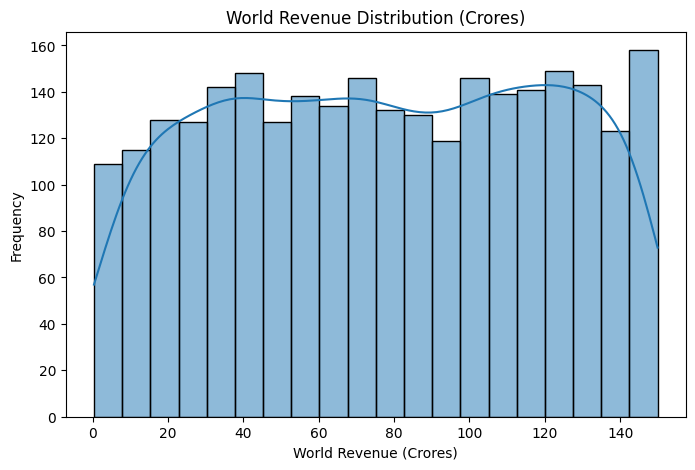

In [24]:
# Distribution of world_revenue
plt.figure(figsize=(8, 5))
sns.histplot(df['world_revenue'], bins=20, kde=True)
plt.title('World Revenue Distribution (Crores)')
plt.xlabel('World Revenue (Crores)')
plt.ylabel('Frequency')
plt.show()

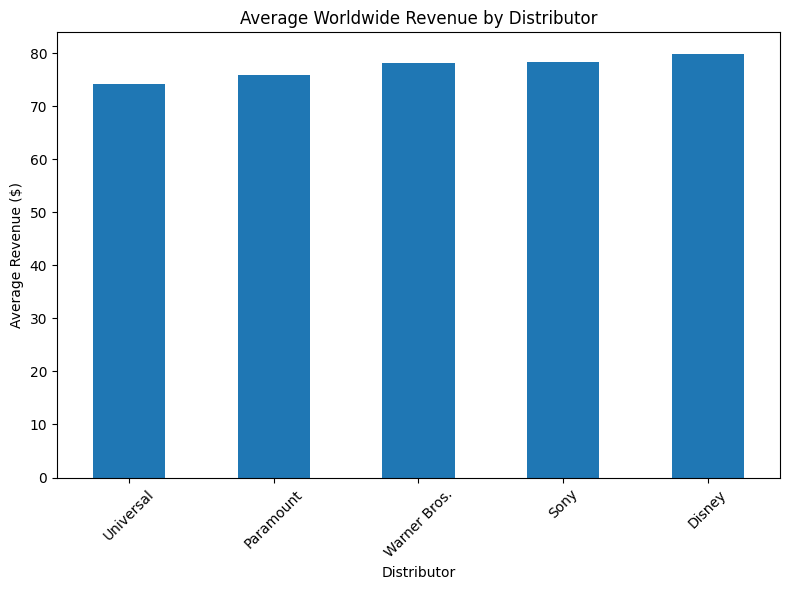

In [27]:
plt.figure(figsize=(8, 6))
distributor_revenue = df.groupby('distributor')['world_revenue'].mean().sort_values()
distributor_revenue.plot(kind='bar')
plt.title('Average Worldwide Revenue by Distributor')
plt.xlabel('Distributor')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

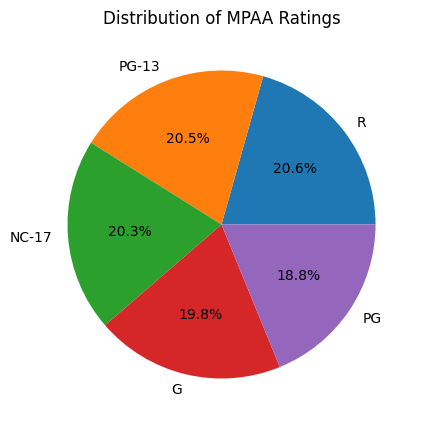

In [29]:
plt.figure(figsize=(5, 5))
mpaa_counts = df['MPAA'].value_counts()
plt.pie(mpaa_counts, labels=mpaa_counts.index, autopct='%1.1f%%')
plt.title('Distribution of MPAA Ratings')
plt.show()

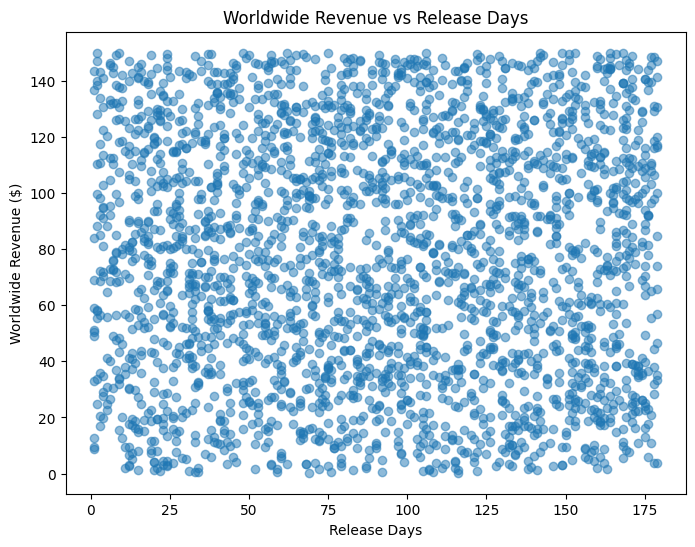

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(df['release_days'], df['world_revenue'], 'o', alpha=0.5)
plt.title('Worldwide Revenue vs Release Days')
plt.xlabel('Release Days')
plt.ylabel('Worldwide Revenue ($)')
plt.show()

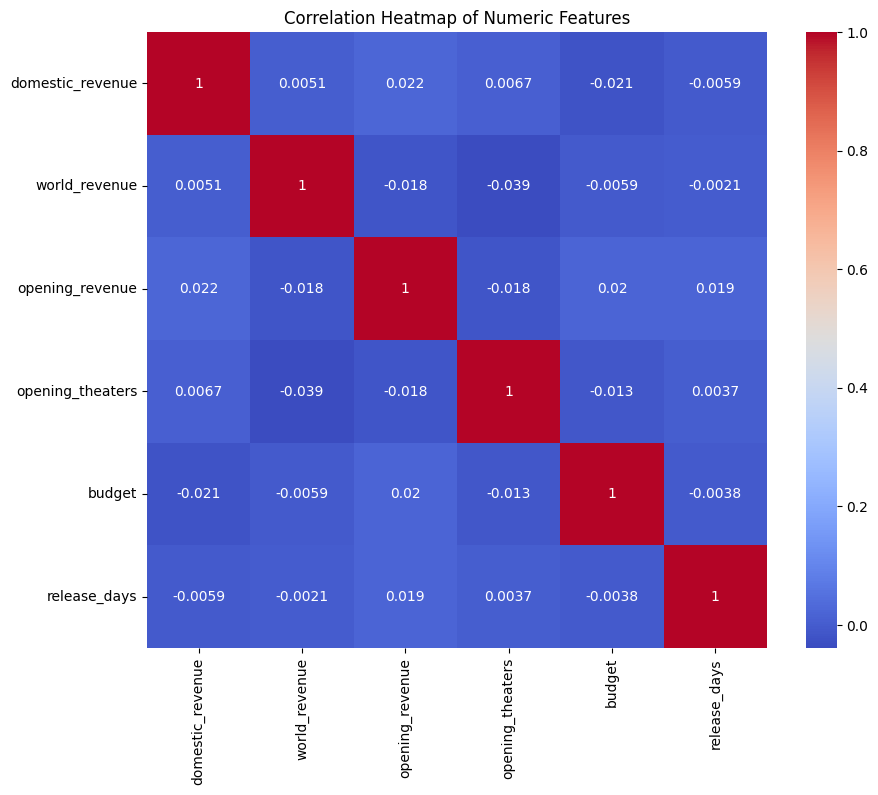

In [33]:
plt.figure(figsize=(10, 8))
numeric_cols = ['domestic_revenue', 'world_revenue', 'opening_revenue',
                'opening_theaters', 'budget', 'release_days']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

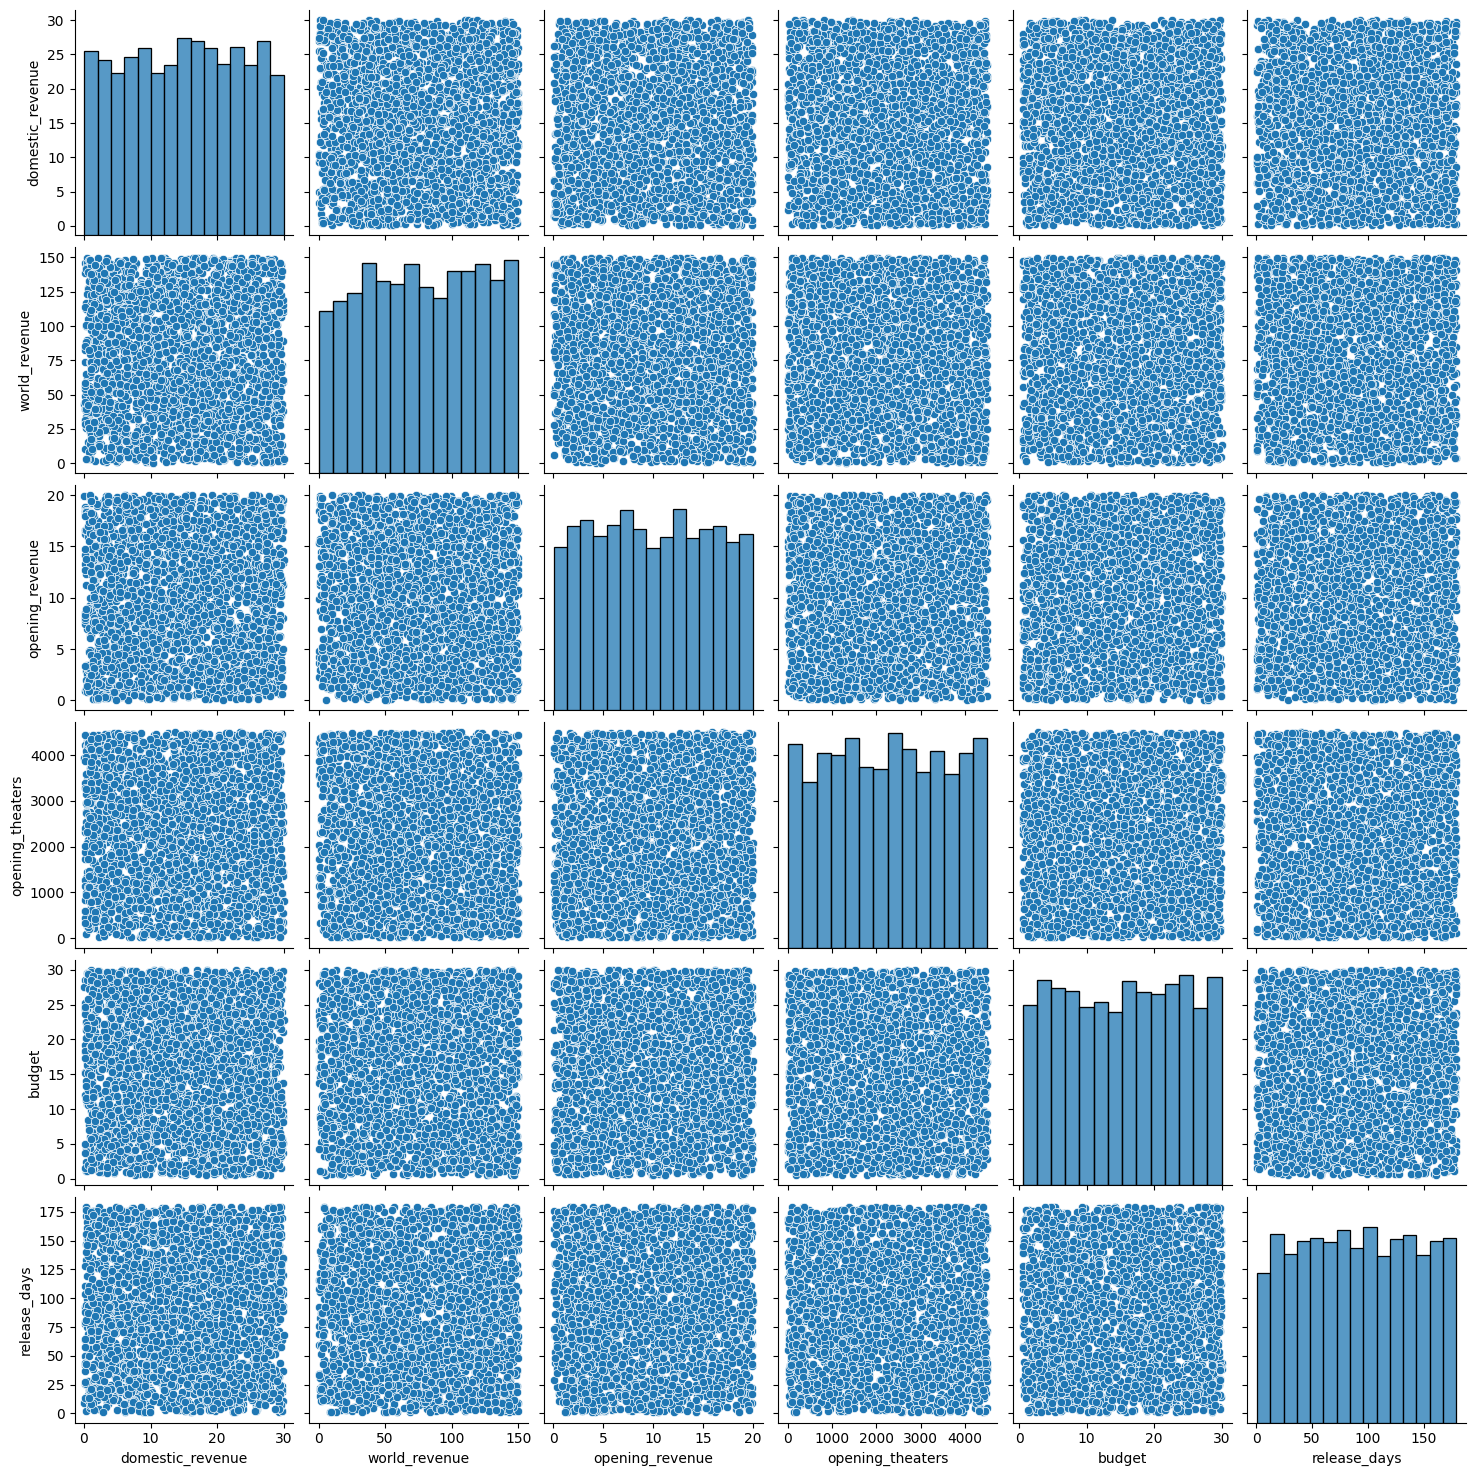

In [39]:
sns.pairplot(df[numeric_cols])
plt.show()

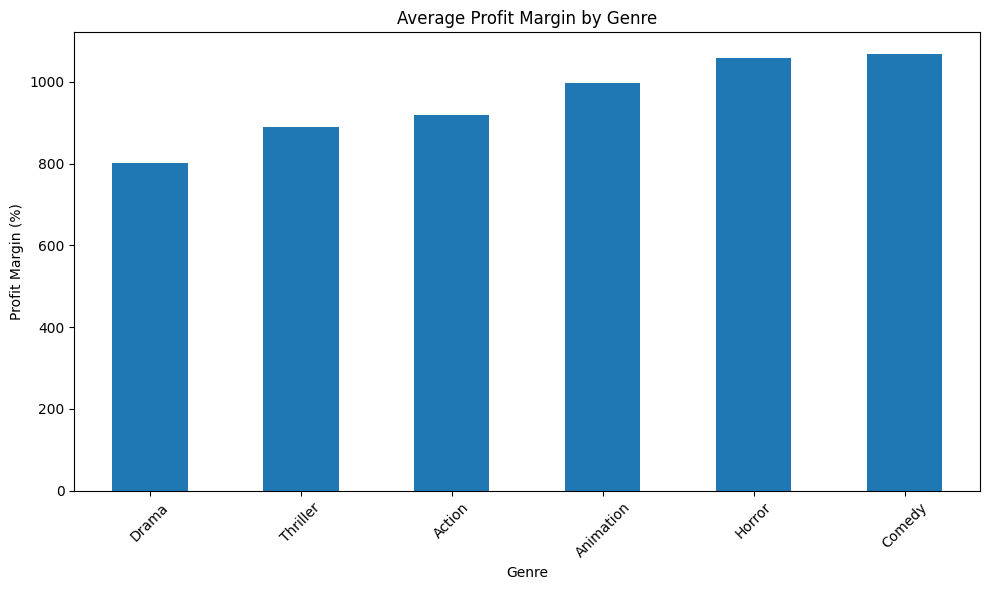

In [41]:
# Calculate profit margin
df['profit_margin'] = (df['world_revenue'] - df['budget']) / df['budget'] * 100

# Visualization of profit margin by genre
plt.figure(figsize=(10, 6))
genre_profit = df.groupby('genres')['profit_margin'].mean().sort_values()
genre_profit.plot(kind='bar')
plt.title('Average Profit Margin by Genre')
plt.xlabel('Genre')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

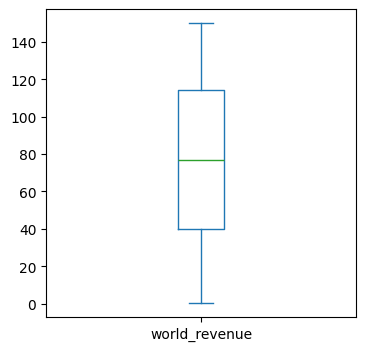

In [44]:
plt.figure(figsize=(4, 4))
df['world_revenue'].plot(kind='box')

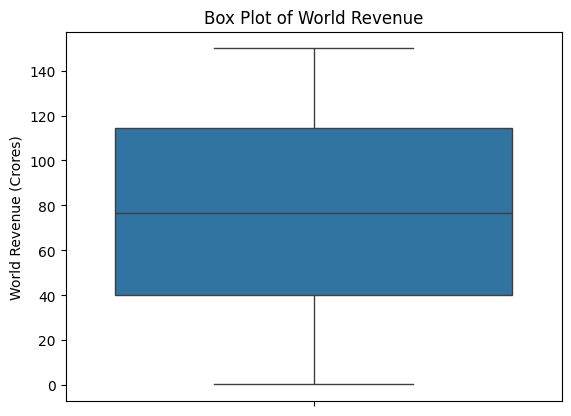

In [45]:
sns.boxplot(y=df['world_revenue'])
plt.title('Box Plot of World Revenue')
plt.ylabel('World Revenue (Crores)')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()
df['distributor_encoded'] = le.fit_transform(df['distributor'])
df['MPAA_encoded'] = le.fit_transform(df['MPAA'])
df['genres_encoded'] = le.fit_transform(df['genres'])

X = df[['domestic_revenue', 'opening_revenue', 'opening_theaters',
        'budget', 'release_days', 'distributor_encoded',
        'MPAA_encoded', 'genres_encoded']]
y = df['world_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# # Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# # Model Evaluation
print("\nModel Performance:")
print("Linear Regression:")
print(f"R2 Score: {r2_score(y_test, lr_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.4f}")


Model Performance:
Linear Regression:
R2 Score: -0.0108
RMSE: 43.2967


In [50]:
# # Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\nRandom Forest:")
print(f"R2 Score: {r2_score(y_test, rf_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.4f}")


Random Forest:
R2 Score: -0.0233
RMSE: 43.5633


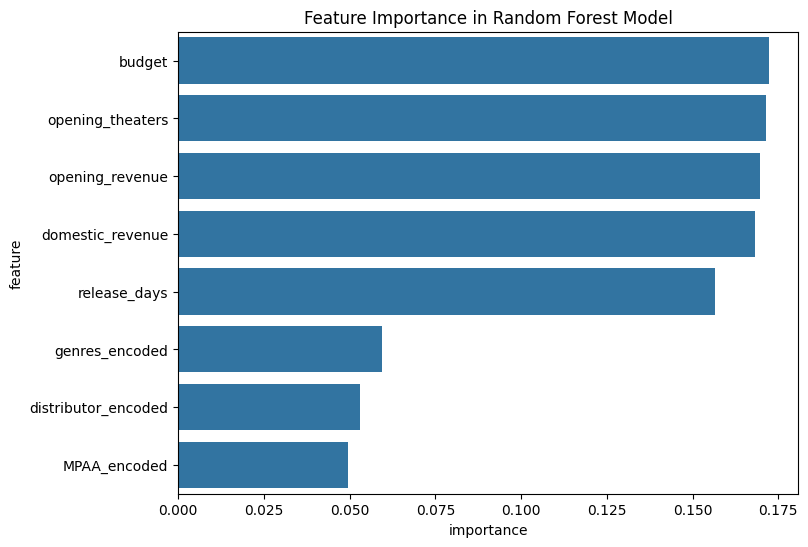

In [52]:
# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.show()

Regression Performance Metrics:
               Model  R2 Score       RMSE        MAE
0  Linear Regression -0.010780  43.296652  37.418422
1      Random Forest -0.023269  43.563324  37.389354


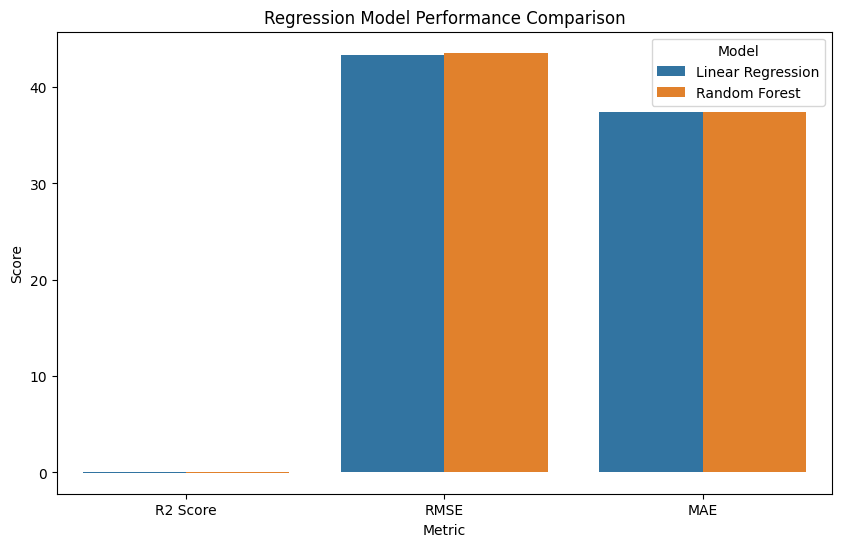

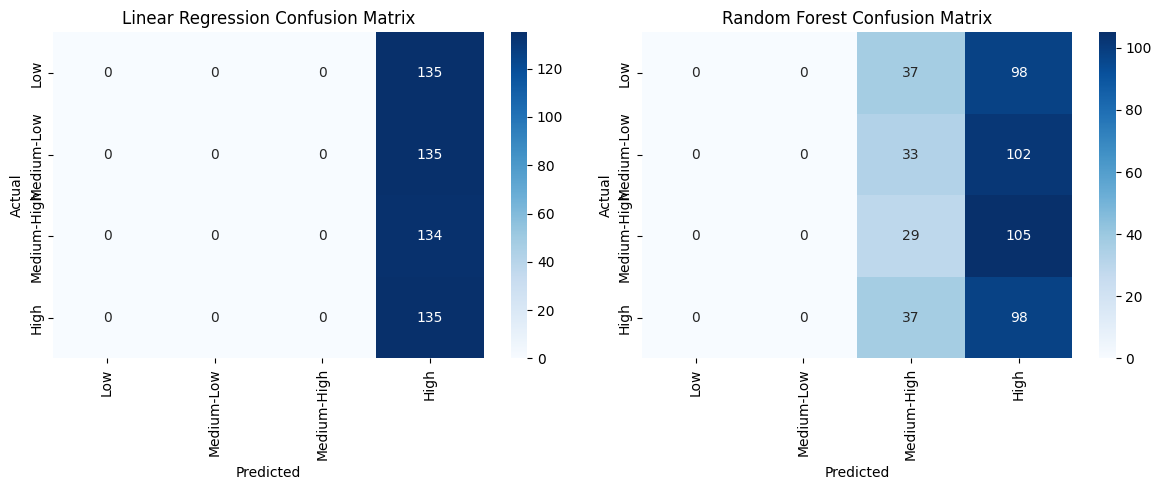

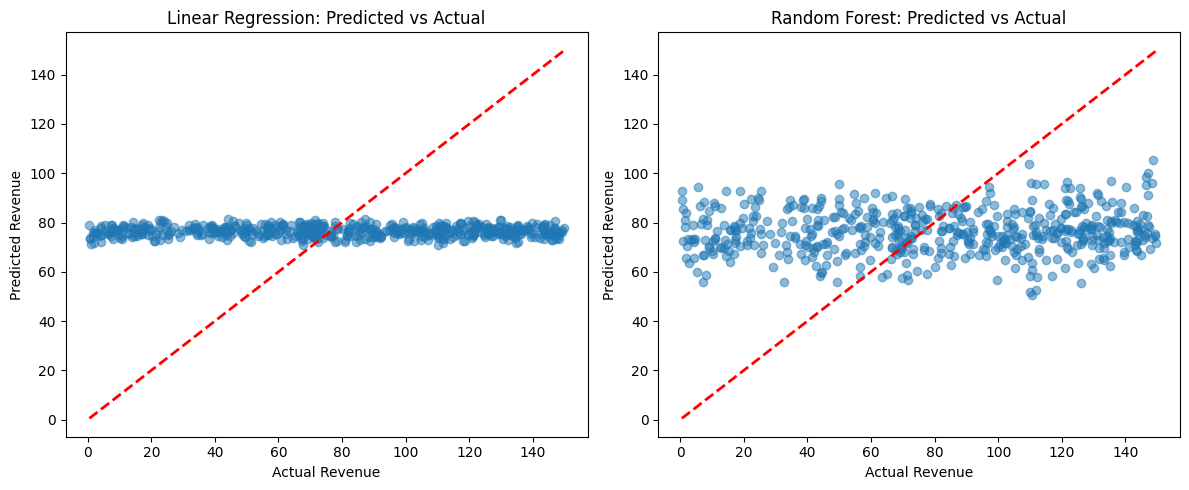

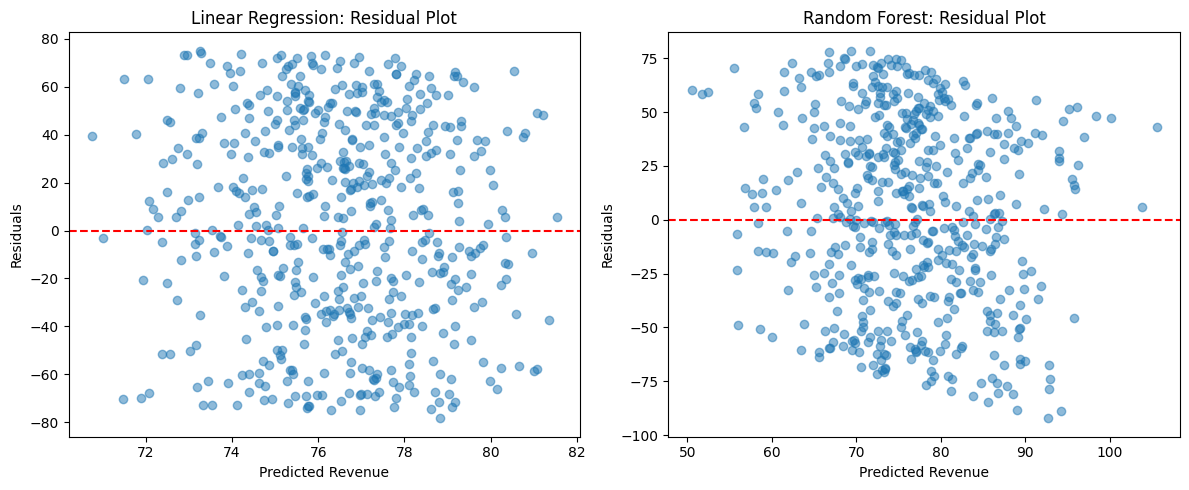

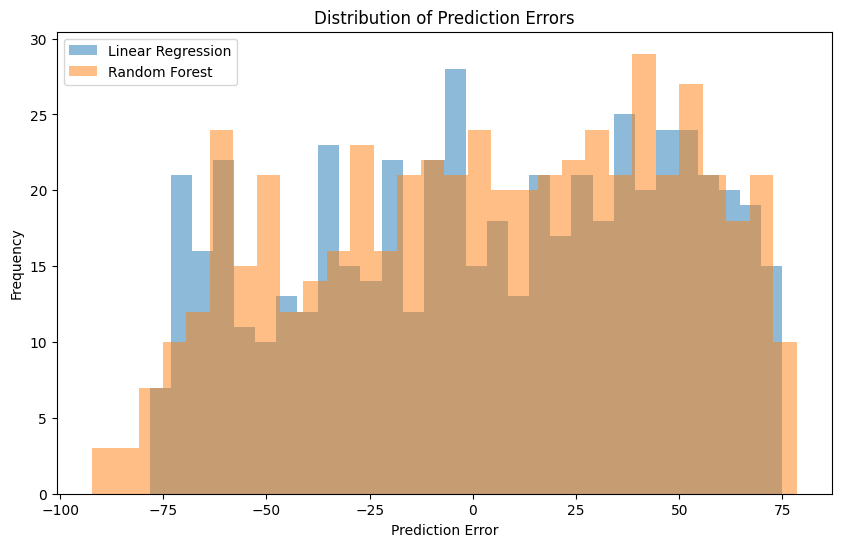

In [54]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Prepare data
le = LabelEncoder()
df['distributor_encoded'] = le.fit_transform(df['distributor'])
df['MPAA_encoded'] = le.fit_transform(df['MPAA'])
df['genres_encoded'] = le.fit_transform(df['genres'])

X = df[['domestic_revenue', 'opening_revenue', 'opening_theaters',
        'budget', 'release_days', 'distributor_encoded',
        'MPAA_encoded', 'genres_encoded']]
y = df['world_revenue']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Calculate regression metrics
metrics = {
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, lr_pred)),
             np.sqrt(mean_squared_error(y_test, rf_pred))],
    'MAE': [mean_absolute_error(y_test, lr_pred),
            mean_absolute_error(y_test, rf_pred)]
}

metrics_df = pd.DataFrame(metrics)
print("Regression Performance Metrics:")
print(metrics_df)
metrics_df.to_csv('model_metrics.csv', index=False)

# Convert continuous values to categories for confusion matrix
# Define bins based on quartiles
bins = np.quantile(y_test, [0, 0.25, 0.5, 0.75, 1.0])
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']

y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
lr_pred_binned = pd.cut(lr_pred, bins=bins, labels=labels, include_lowest=True)
rf_pred_binned = pd.cut(rf_pred, bins=bins, labels=labels, include_lowest=True)

# Calculate confusion matrices
lr_cm = confusion_matrix(y_test_binned, lr_pred_binned)
rf_cm = confusion_matrix(y_test_binned, rf_pred_binned)

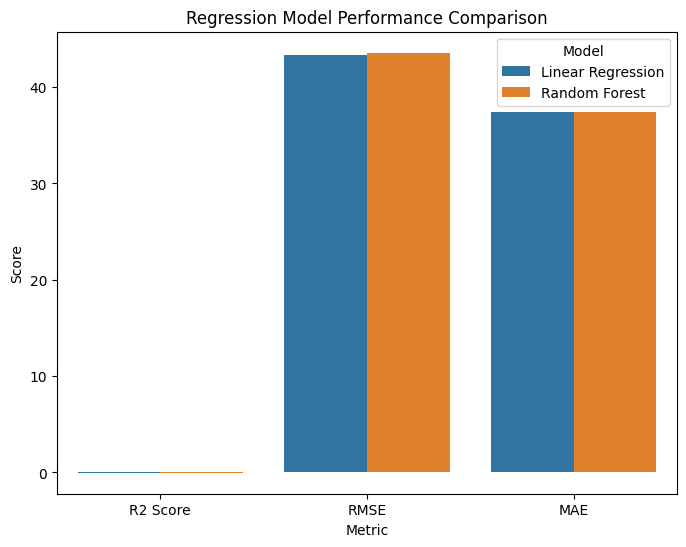

In [60]:
# Visualization 1: Bar plot of regression metrics
plt.figure(figsize=(8, 6))
metrics_melted = metrics_df.melt(id_vars=['Model'],
                                value_vars=['R2 Score', 'RMSE', 'MAE'],
                                var_name='Metric',
                                value_name='Value')
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted)
plt.title('Regression Model Performance Comparison')
plt.ylabel('Score')
plt.savefig('metrics_comparison.png')
plt.show()

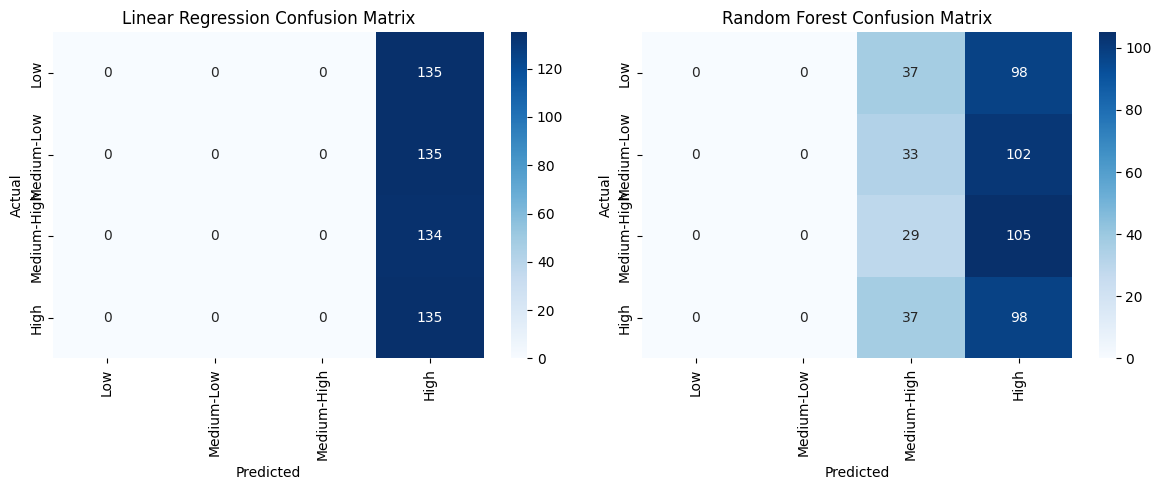

In [61]:
# Visualization 2: Confusion Matrices
plt.figure(figsize=(12, 5))

# Linear Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Linear Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

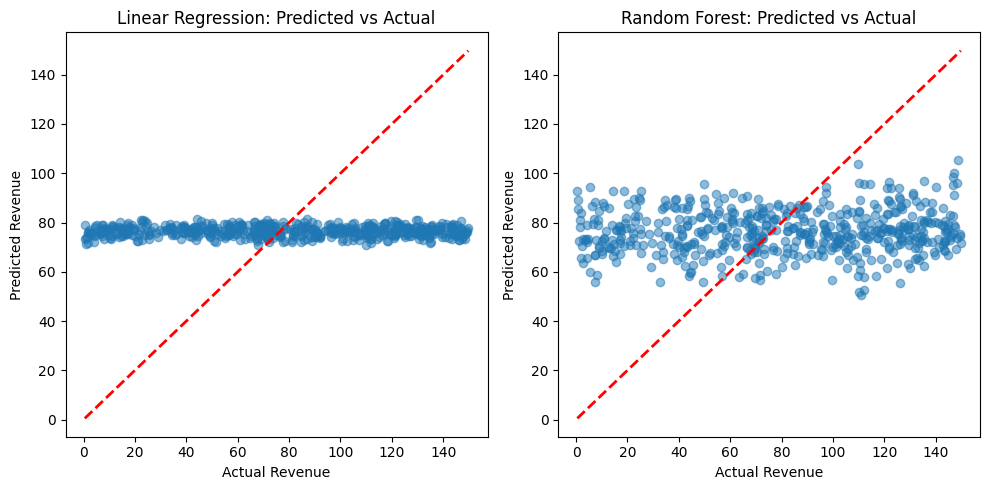

In [65]:

# Visualization 3: Predicted vs Actual scatter plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')

plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')

plt.tight_layout()
plt.savefig('predicted_vs_actual.png')
plt.show()

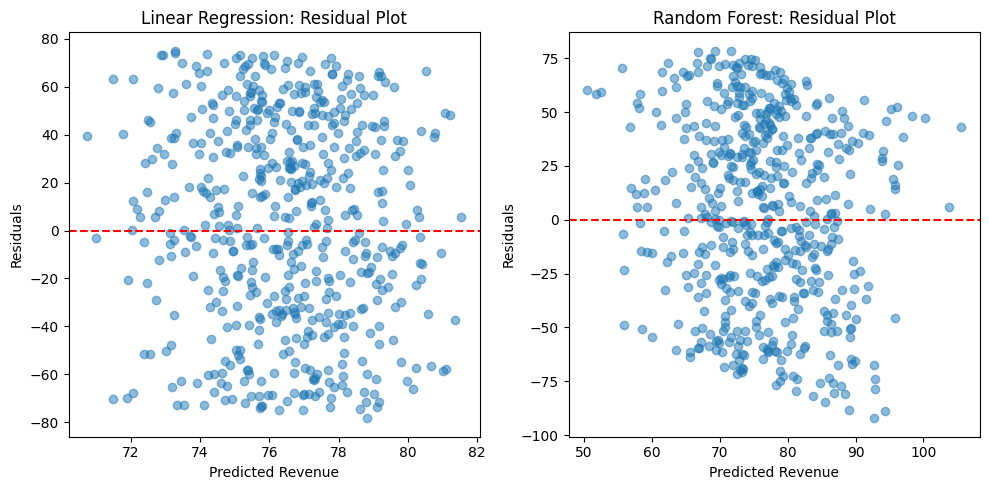

In [64]:
# Visualization 4: Residual plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
lr_residuals = y_test - lr_pred
plt.scatter(lr_pred, lr_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Linear Regression: Residual Plot')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
rf_residuals = y_test - rf_pred
plt.scatter(rf_pred, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Random Forest: Residual Plot')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')

plt.tight_layout()
plt.savefig('residual_plots.png')
plt.show()

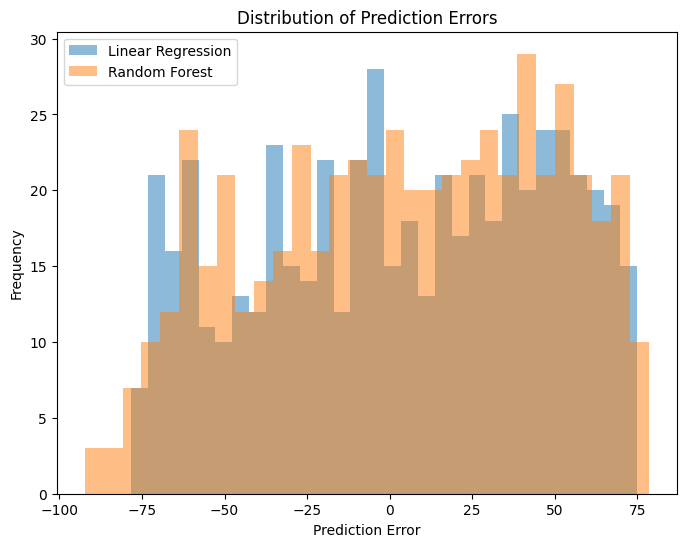

In [67]:

# Visualization 5: Error Distribution
plt.figure(figsize=(8, 6))
plt.hist(lr_residuals, bins=30, alpha=0.5, label='Linear Regression')
plt.hist(rf_residuals, bins=30, alpha=0.5, label='Random Forest')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('error_distribution.png')
plt.show()

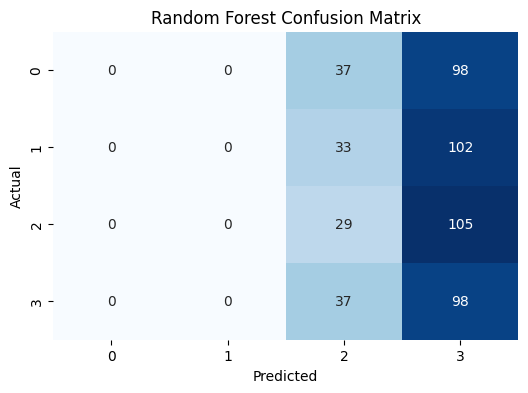

In [68]:
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()